In [1]:
import io
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib as Path
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import math
from collections import Counter
import rhinoMorph
import jpype

In [6]:
train_dir = os.path.join(r'C:\Users\user\Desktop\짼솔\빅리더\프로젝트\딥러닝을_이용한_자연어처리\0829텍스트다중분류_RNN', 'train')
test_dir = os.path.join(r'C:\Users\user\Desktop\짼솔\빅리더\프로젝트\딥러닝을_이용한_자연어처리\0829텍스트다중분류_RNN', 'test')

label_types = ['개인정보담당자정보','불필요정보']

In [7]:
# text와 labels 리스트를 만드는 함수를 작성한다
def make_texts_labels(dir, label_types, encode='utf8'):    
    texts = []
    labels = []
    
    for label_type in label_types:
        dir_name = os.path.join(dir, label_type)    
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':                   
                f = open(os.path.join(dir_name, fname), encoding=encode)
                texts.append(f.read())                    
                f.close()
        
                if label_type == label_types[0]:          
                    labels.append(1)                       
                elif label_type == label_types[1]:
                    labels.append(0)
    return texts, labels

In [8]:
type(label_types)

list

labels= list(all_data.iloc[:, 1])

In [9]:
# Train Data Loading
# 훈련 데이터의 텍스트와 라벨을 받아온다

texts, labels = make_texts_labels(train_dir, label_types)

print('texts 0:', texts[0])
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: 이름
texts len: 33574
labels 0: 1
labels len: 33574


In [10]:
# Analyzing Morphology
# 한글은 tokenizing을 위해서 먼저 형태소분석을 해야 한다
import rhinoMorph
rn = rhinoMorph.startRhino()                         		

# 리스트 컴프리헨션으로 실질형태소만을 리스트로 가져온다
texts = [rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNB', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ', 'SF', 'SP', 'SO', 'SN', 'SL', 'NF', 'EC', 'SW', 'NA', 'EP'], eomi=False) for sentence in texts]

print(texts)
print(texts[0])

filepath:  c:\python\lib\site-packages
classpath:  c:\python\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
validation_ratio = math.floor(len(texts) * 0.3)    	
max_words = 100000                              
maxlen = 2000                                     
class_number = 2                                  
tokenizer = Tokenizer(num_words=max_words)       
tokenizer.fit_on_texts(texts)                     
word_index = tokenizer.word_index               

In [12]:
# 전체 데이터가 가지고 있는 토큰의 수를 보여준다. texts_to_sequences()를 거쳐야 10,000개만 남는다. 

print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ', word_index)

전체에서 9333개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'': 6, 'innovation': 5597, '영역': 1381, 'shallweadcorp': 8569, '비바': 2374, '피부': 1272, '수택': 6663, '스페셜': 5105, '과거': 2734, '대한항공': 1330, '해결': 820, 'kgl': 6171, '개별': 971, '이용후': 6827, 'us': 1404, '1000': 4965, '문화': 1241, '폭스': 4244, 'management': 2444, '향': 1729, 'swit': 8754, 'necessary': 2798, '7727': 7279, '거소': 5565, '별명': 1969, '시행일': 248, '지니': 1871, '당하': 332, 'conduct': 4771, '21': 803, '위원회': 613, '지연이자': 4158, 'k': 1562, '경비': 6030, '1900': 2307, '영': 1691, '전병옥': 4295, 'connection': 4747, 'refund': 3660, '사한': 4566, '제명': 1599, '아마존': 3602, '안용운': 8725, '준시': 8959, '트': 663, '캠프': 4307, '0532': 6786, '노노': 989, '완전': 1986, 'carrier': 5614, 'click': 1407, '가': 117, '뷰': 2699, '동조': 9286, '임자': 354, '강력': 5280, 'delimited': 6525, '사행': 8124, '구창근': 7039, '재등록': 6424, '홍': 4309, '주행거리': 3652, 'disposed': 5477, '가분적': 5455, 'plleti': 7848, '열차': 8798, '홍세희': 8325, 'lte': 8441, '최영석': 9027, '거주자': 8658, '

In [13]:
# Data Sequencing
# train 데이터를 Sequencing 한다
# 상위 빈도 10,000개의 단어를 word_index의 숫자 리스트로 변환. Tokenizer 결과가 여기서 반영된다
data = tokenizer.texts_to_sequences(texts) 

# maxlen의 수만큼으로 2D 텐서를 만든다
data = pad_sequences(data, maxlen=maxlen)

print('data:', data)

data: [[   0    0    0 ...    0    0   52]
 [   0    0    0 ...    0    0   52]
 [   0    0    0 ...    0    0   52]
 ...
 [   0    0    0 ... 4517    8   15]
 [   0    0    0 ...   60   10    3]
 [   0    0    0 ...    4    2   11]]


In [14]:
# One-Hot Encoding
# 원-핫 인코딩 함수
def to_one_hot(labels, dimension):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


# 입력층에는 원-핫 인코딩을 수행하지 않는다
#data = to_one_hot(data, dimension=max_words)

# 출력층만 원-핫 인코딩을 수행한다 
labels = to_one_hot(labels, dimension=class_number)

In [15]:
# 출력층의 형태
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [16]:
# Train data와 Validation data 준비

print('데이터 텐서의 크기:', data.shape)        
print('레이블 텐서의 크기:', labels.shape)      

indices = np.arange(data.shape[0])     
np.random.shuffle(indices)                      
data = data[indices]                            
labels = labels[indices]                       

x_train = data[validation_ratio:]             
y_train = labels[validation_ratio:]              
x_val = data[:validation_ratio]                  
y_val = labels[:validation_ratio]              

데이터 텐서의 크기: (33574, 2000)
레이블 텐서의 크기: (33574, 2)


## model. Keras Enbedding

In [17]:
# # 모델 정의하기, Keras Embedding, L2, dropout
# # 보다 쉽게 사용할 수 있는 Keras Embedding으로 진행
# from tensorflow.keras import models
# from tensorflow.keras import layers, regularizers

# embedding_dim = 50                               
# model = models.Sequential()                
# # 임베딩 층. 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 input_length(=maxlen)를 지정. 출력층은 (input_dim, input_length, output_dim)가 됨
# model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
# model.add(layers.Flatten())                    
# # 은닉층
# model.add(layers.Dense(units=32, kernel_regularizer= regularizers.l2(0.001), activation='relu'))

# model.add(layers.Dropout(0.2))

# # 출력층. 출력 노드는 분류 개수인 9. 활성화 함수는 sigmoid와 성격이 같으나 다중분류에 사용되는 함수인 softmax 함수를 사용한다. 확률값을 출력
# model.add(layers.Dense(units=class_number, activation='sigmoid'))

## model. RNN

In [18]:
# 모델 정의하기, Rnn, L2, dropout
# 보다 쉽게 사용할 수 있는 Keras Embedding으로 진행
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, Dropout
embedding_dim = 50                               
model = models.Sequential()                
# 임베딩 층. 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 input_length(=maxlen)를 지정. 출력층은 (input_dim, input_length, output_dim)가 됨
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(SimpleRNN(40))                  
# 은닉층
model.add(Dense(units=32, kernel_regularizer= regularizers.l2(0.001), activation='relu'))
          
model.add(Dropout(0.2)) 

# 출력층. 출력 노드는 분류 개수인 2. 활성화 함수는 sigmoid와 성격이 같으나 다중분류에 사용되는 함수인 softmax 함수를 사용한다. 확률값을 출력
model.add(Dense(units=class_number, activation='sigmoid'))

## model. LSTM

In [19]:
# 모델 정의하기, Rnn, L2, dropout
# 보다 쉽게 사용할 수 있는 Keras Embedding으로 진행
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
embedding_dim = 50                               
model = models.Sequential()                
# 임베딩 층. 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 input_length(=maxlen)를 지정. 출력층은 (input_dim, input_length, output_dim)가 됨
model.add(Embedding(max_words, 16))
model.add(LSTM(16))                  
# 은닉층
model.add(Dense(units=32, activation='relu'))
          
model.add(Dropout(0.2)) 

# 출력층. 출력 노드는 분류 개수인 2. 활성화 함수는 sigmoid와 성격이 같으나 다중분류에 사용되는 함수인 softmax 함수를 사용한다. 확률값을 출력
model.add(Dense(units=class_number, activation='sigmoid'))

## model.Twin LSTM

In [20]:
# 모델 정의하기, Keras Embedding
# 보다 쉽게 사용할 수 있는 Keras Embedding으로 진행
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional, Flatten



embedding_dim = 50                                                            
model = models.Sequential()                
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(5, 10)))
model.add(Bidirectional(LSTM(10, return_sequences=False)))
model.add(Dense(5))

# 임베딩 층. 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 input_length(=maxlen)를 지정. 출력층은 (input_dim, input_length, output_dim)가 됨
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())                    


# 은닉층
model.add(Dense(units=32, kernel_regularizer= regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))

# 출력층. 출력 노드는 분류 개수인 9. 활성화 함수는 sigmoid와 성격이 같으나 다중분류에 사용되는 함수인 softmax 함수를 사용한다. 확률값을 출력
model.add(Dense(units=class_number, activation='sigmoid'))


In [21]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
# Train Model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
history_dict = history.history

Train on 23502 samples, validate on 10072 samples
Epoch 1/10
23502/23502 [==============================] - 416s 18ms/sample - loss: 0.1565 - acc: 0.9519 - val_loss: 0.0698 - val_acc: 0.9861
Epoch 2/10
23502/23502 [==============================] - 410s 17ms/sample - loss: 0.0523 - acc: 0.9863 - val_loss: 0.0524 - val_acc: 0.9866
Epoch 3/10
23502/23502 [==============================] - 406s 17ms/sample - loss: 0.0382 - acc: 0.9898 - val_loss: 0.0538 - val_acc: 0.9773
Epoch 4/10
23502/23502 [==============================] - 406s 17ms/sample - loss: 0.0346 - acc: 0.9907 - val_loss: 0.0403 - val_acc: 0.9884
Epoch 5/10
23502/23502 [==============================] - 405s 17ms/sample - loss: 0.0318 - acc: 0.9916 - val_loss: 0.0430 - val_acc: 0.9839
Epoch 6/10
21024/23502 [=========================>....] - ETA: 57:04 - loss: 0.0296 - acc: 0.9916

In [ ]:
# 경로 변경
%'rC:\Users\user\Desktop\빅리더\프로젝트\딥러닝을_이용한_자연어처리'

In [20]:
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다
model.save('text_multi_we_model.h5')    

# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다
import pickle
with open('text_multi_we_tokenizer.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
# Accuracy and Loss 확인
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) +1)

Accuracy of each epoch: [0.94689816, 0.9884265, 0.9905114, 0.9909795, 0.99114966, 0.9906391, 0.99229854, 0.9928091, 0.9919156, 0.9930644]


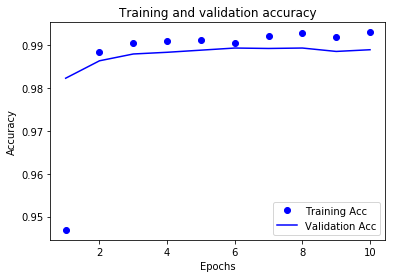

In [22]:
# Plotting Accuracy
# 정확도와 손실값의 변화를 보고, epoch를 어디에서 조절해야 할 지를 가늠한다.
# 정확도가 떨어지는 구간, 손실값이 높게 나타나는 구간을 확인한다
# 데이터가 큰 경우 대개 epoch를 늘려야 최적값에 도달한다
import matplotlib.pyplot as plt

# 정확도 그리기
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()            			

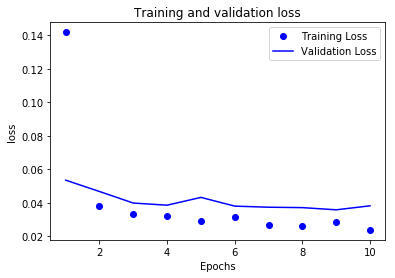

In [23]:
# Plotting Loss
plt.figure()            		# 새로운 그림을 그린다

# 손실값 그리기
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()            		

plt.show()

In [37]:
# Load Model
import os
from tensorflow.keras.models import load_model
import pickle

filepath = r'C:\Users\user\Desktop\빅리더\프로젝트\딥러닝을_이용한_자연어처리'
os.chdir(filepath)
print("Current Directory:", os.getcwd())

loaded_model = load_model('text_multi_we_model.h5')
print("model loaded:", loaded_model)

with open('text_multi_we_tokenizer.pickle', 'rb') as handle:
       loaded_tokenizer = pickle.load(handle)

Current Directory: C:\Users\user\Desktop\빅리더\프로젝트\딥러닝을_이용한_자연어처리
model loaded: <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001E1920C8CF8>


In [38]:
# Test Data Loading
# 테스트 데이터의 텍스트와 라벨을 받아온다

texts, labels = make_texts_labels(test_dir, label_types)

print('texts 0:', texts[0])
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: · 개인정보 보호책임자(CPO)
성 명 : 류인열
직 위 : 경영지원실장
전화번호 : 070-4580-5837
이메일 : privacy@trncompany.co.kr
texts len: 119
labels 0: 1
labels len: 119


In [39]:
# 로딩된 tokenizer로 test 데이터를 Sequencing 한다
data = loaded_tokenizer.texts_to_sequences(texts) 
x_test = pad_sequences(data, maxlen=maxlen)     
print('data:', data)


# label에 해당하는 부분만 one-hot-encoding 한다.
# x_test = to_one_hot(data, dimension=max_words)
y_test = to_one_hot(labels, dimension=class_number)

data: [[103, 2921, 314, 75, 152, 182, 82, 1220, 42, 341, 494, 132], [52, 2046, 551, 782, 99, 3675, 42, 1454, 6995, 494, 132], [40, 153, 81, 271, 138, 295, 285, 2331, 4030, 152, 182, 2969, 1568, 4985, 132, 62, 24, 138, 295, 285, 2331, 4030, 2969, 1568, 4985, 132], [1825, 153, 152, 182, 919, 1566, 76, 719, 1568, 258, 82, 285, 53, 153, 1198, 333, 152, 182, 1615, 92, 258, 82, 285], [40, 81, 271, 138, 295, 1492, 7849, 152, 182, 1567, 1566, 76, 1898, 258, 62, 81, 271, 138, 295, 1492, 7849, 152, 182, 2930, 1566, 76, 1898, 258], [40, 139, 176, 15, 193, 39, 139, 176, 39, 143, 42, 622, 492, 1219, 2514, 1247, 139, 176, 39, 126, 91, 42, 1247, 492, 1219], [24, 153, 2753, 341, 2085, 220, 126, 3680, 222, 273, 1298, 1219, 24, 135, 220, 126, 1615, 125, 1443, 4552, 222, 273, 3713, 8393, 1298, 1219], [220, 99, 1567, 82, 3256, 62, 81, 1566, 76, 132], [153, 5772, 135, 3237, 285, 7221], [52, 220, 99, 3238, 42, 341, 1325, 258, 82, 1661, 52, 220, 99, 42, 341, 1325, 258, 82, 1661], [314, 75, 152, 182, 2924, 36

In [42]:
# Test Data Evaluation
test_eval = loaded_model.evaluate(x_test, y_test)
print('prediction model loss & acc:', test_eval)

119/119 [==============================] - 0s 2ms/sample - loss: 3.1417 - acc: 0.2521
prediction model loss & acc: [3.1416677782515516, 0.25210086]


In [43]:
predictions = loaded_model.predict(x_test)
print('predictions shape:', predictions.shape)
print('prediction 0 shape:', predictions[0].shape)
print('prediction 0 sum', np.sum(predictions[0]))             

print('prediction 0 value:', predictions[0])                 
print('prediction 0 max value:', np.argmax(predictions[0]))  
print('prediction 1 max value:', np.argmax(predictions[1])) 
print('prediction 2 max value:', np.argmax(predictions[2]))  

predictions shape: (119, 2)
prediction 0 shape: (2,)
prediction 0 sum 0.9004671
prediction 0 value: [0.00282413 0.89764297]
prediction 0 max value: 1
prediction 1 max value: 1
prediction 2 max value: 1


In [44]:
# 1개 데이터 예측
text = ["""팩스: 000-759-486"""]       

text=[rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in text]
print('형태소 분석 결과:', text)

data = loaded_tokenizer.texts_to_sequences(text)
x_test = pad_sequences(data, maxlen=maxlen)

predictions = loaded_model.predict(x_test)
print("Result:", predictions)                         
print("분류 결과:", np.argmax(predictions[0]))        

형태소 분석 결과: [['팩스']]
Result: [[0.04054398 0.34649992]]
분류 결과: 1


In [45]:
# 1개 데이터 예측
       	# list 타입으로 만든다
#text = ["""피천득"""]
New_page=pd.read_excel(r"C:\Users\user\Desktop\빅리더\프로젝트\딥러닝을_이용한_자연어처리\0829텍스트다중분류_RNN\New_page\New-page.xlsx", endcoding='utf-8')

result_df = pd.DataFrame()
for i in range(0,len(New_page)):
    text = [New_page.iloc[i, 0]]
    text = [rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNB', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ', 'SF', 'SN', 'SP', 'SO', 'SL', 'NF', 'EC', 'SW', 'NA', 'EP'], eomi=False) for sentence in text]
# print('형태소 분석 결과:', text)

    data = loaded_tokenizer.texts_to_sequences(text)
    x_test = pad_sequences(data, maxlen=maxlen)

    predictions = loaded_model.predict(x_test)
    result_df.loc[i, 0] = New_page.iloc[i, 0]
    result_df.loc[i, 1] = np.argmax(predictions[0])
result_df.rename(columns = {0 : 'text', 1 : 'predict'}, inplace = True)
#print("Result:", predictions)                           # 각 분류에 대한 확률을 보여준다
#print("분류 결과:", np.argmax(predictions[0]))         	# 가장 큰 확률값을 가진 분류 제시. 0~8 숫자 중 하나

In [46]:
result_df[result_df['predict']==1]

,text,predict
1,성명: 이찬솔,1.0
2,책임자: 최우석,1.0
3,전화번호:010-5339-0954,1.0
5,이메일: privacy@gmail.com,1.0
